In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
import gc
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

In [6]:
df_reviews= pd.read_csv('C:\\Users\\Tati\\source\\repos\\data_full.csv')

In [7]:
reader=Reader()

In [8]:
data=Dataset.load_from_df(df[['username','product_id','Calif']],reader=reader)

In [9]:
trainset,testset=train_test_split(data,test_size=.3)

In [10]:
algo=SVD()

In [11]:
algo.fit(trainset)

In [12]:
prediction=algo.test(testset)

In [13]:
usuario='Alex'

In [16]:
data_reviews_ok=df.loc[:,['username','Calif','product_id']]

In [20]:
no_vista_usuario=data_reviews_ok[data_reviews_ok["username"]!=usuario]
no_vista_usuario.reset_index(drop=True,inplace=True)
#no_vista_usuario=no_vista_usuario['product_id']

In [21]:
no_vista_usuario

,username,Calif,product_id
0,xiodeni,3,35140
1,Sir Dan the Super Chivalrous,3,506510
2,Keymasher,3,35140
3,dogminster,1,506510
4,baconn07,3,35140
...,...,...,...
237924,Omega-Shenron,2,252490
237925,Pobot,2,252490
237926,Sloba™,2,252490
237927,Testikills,2,252490


In [24]:
no_vista_usuario.count()

username      237929
Calif         237929
product_id    237929
dtype: int64

In [25]:
no_vista_usuario.drop_duplicates(inplace=True)
no_vista_usuario.count()

<ipython-input-25-d521403353da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vista_usuario.drop_duplicates(inplace=True)


username      207822
Calif         207822
product_id    207822
dtype: int64

In [26]:
no_vista_usuario.reset_index(drop=True,inplace=True)
no_vista_usuario

,username,Calif,product_id
0,xiodeni,3,35140
1,Sir Dan the Super Chivalrous,3,506510
2,Keymasher,3,35140
3,dogminster,1,506510
4,baconn07,3,35140
...,...,...,...
207817,Omega-Shenron,2,252490
207818,Pobot,2,252490
207819,Sloba™,2,252490
207820,Testikills,2,252490


In [27]:
no_vista_usuario['Username']=usuario

<ipython-input-27-1a6dbf8c99c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_vista_usuario['Username']=usuario


In [28]:
no_vista_usuario

,username,Calif,product_id,Username
0,xiodeni,3,35140,Alex
1,Sir Dan the Super Chivalrous,3,506510,Alex
2,Keymasher,3,35140,Alex
3,dogminster,1,506510,Alex
4,baconn07,3,35140,Alex
...,...,...,...,...
207817,Omega-Shenron,2,252490,Alex
207818,Pobot,2,252490,Alex
207819,Sloba™,2,252490,Alex
207820,Testikills,2,252490,Alex


In [29]:
accuracy.rmse(prediction)

RMSE: 0.1859


0.18585899787097174

In [30]:
rmse_test_means = []
factores = [1,2,4,8,16,32]

for factor in factores:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


Número de Factores: 1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.1804  0.1845  0.1816  0.1822  0.0017  
Fit time          1.99    2.06    2.12    2.05    0.05    
Test time         0.53    0.39    0.50    0.47    0.06    

Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.1826  0.1825  0.1820  0.1824  0.0002  
Fit time          2.13    2.03    2.06    2.07    0.04    
Test time         0.50    0.50    0.49    0.50    0.00    

Número de Factores: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.1813  0.1814  0.1842  0.1823  0.0014  
Fit time          2.15    2.24    2.25    2.21    0.04    
Test time         0.49    0.36    0.36    0.40    0.06    

Número de Factores: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

    

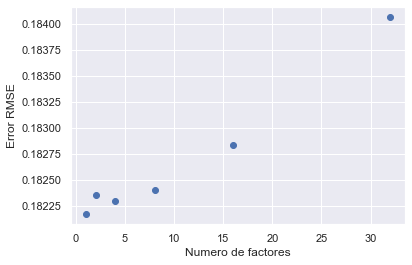

In [31]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [32]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)

In [33]:
gs.fit(data)

In [34]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.1812176729840841
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.001, 'reg_all': 0.2}
